# Case Study: Recognize digits in cheques

<img src="http://i0.wp.com/static1.squarespace.com/static/50c8e51ce4b052a90587d0c7/50d0ac00e4b0c5ef5456201e/50d0ac09e4b0c5ef545622b1/1355852921526/">

# Let's apply the data science process we learnt

## Input and Output

Image is collection of pixels
<img src="https://tensorflow.rstudio.com/tensorflow/articles/images/MNIST-Matrix.png" width="600" height="200">

## Collect Data

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png">

In [1]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
import matplotlib.pyplot as plt

plt.imshow(train_images[0], cmap=plt.cm.binary)

In [4]:
print(train_labels[0])

5


## Output

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Let's have a look at the test data:

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

In [9]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

# Data Preprocessing

In [10]:
# Flatten array
train_images = train_images.reshape((60000, 28 * 28))

# normalize to 0 to 1
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255


from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [11]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Define Model

<img src="https://i.imgur.com/AkSQDyH.png" width="600" height="400">

In [12]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(10, activation='softmax'))

In [13]:
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Train

In [14]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.2561 - acc: 0.9270
Epoch 2/5
60000/60000 [==============================] - 4s 69us/step - loss: 0.1026 - acc: 0.9690
Epoch 3/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.0675 - acc: 0.9797
Epoch 4/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.0489 - acc: 0.9848
Epoch 5/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.0374 - acc: 0.9888


Two quantities are being displayed during training: the "loss" of the network over the training data, and the accuracy of the network over 
the training data.

We quickly reach an accuracy of 0.989 (i.e. 98.9%) on the training data. Now let's check that our model performs well on the test set too:

# Test

**Let's explore few test images**

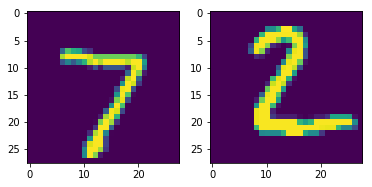

In [15]:
plt.subplot(1, 2, 1)
plt.imshow(test_images[0].reshape(28, 28))
plt.subplot(1, 2, 2)
plt.imshow(test_images[1].reshape(28, 28))

In [16]:
# Probabilities to be 0 to 9
model.predict(test_images[:1])

array([[1.2045931e-08, 1.6056263e-09, 1.1512135e-06, 4.8065936e-05,
        7.9448980e-13, 5.3770797e-09, 4.0485604e-15, 9.9995053e-01,
        5.5432952e-08, 2.0300213e-07]], dtype=float32)

In [17]:
# Take index with maximum probability
model.predict_classes(test_images[:2])

array([7, 2])

**Test all test images**

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 42us/step


In [19]:
print('test_acc:', test_acc)

test_acc: 0.9824


**Note:** Test accuracy < Training accuracy